# Harmonic-Percussive Source Separation (HPSS)

(1025, 427)


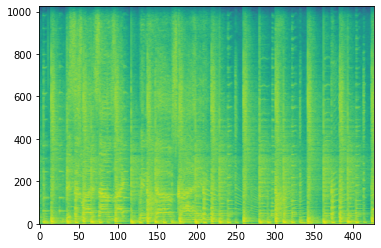

In [1]:
%load_ext autoreload
%autoreload 2
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd
from scipy import signal
from spectrogramtools import *
from collections import OrderedDict

y, sr = librosa.load("doves.wav", sr=22050)
win_length = 2048
hop_length = 512

S = STFT(y, win_length, hop_length, useLibrosa=False)
SAbs = np.abs(S)

print(S.shape)
plt.imshow(np.log10(SAbs/1e-3), aspect='auto')
plt.gca().invert_yaxis()
#librosa.display.specshow(librosa.amplitude_to_db(np.abs(S), ref=np.max), y_axis='log', x_axis='time')
ipd.Audio(y, rate=sr)

In [2]:
ipd.Audio(y, rate=sr)

In [3]:
winh = 20
SH = signal.medfilt(SAbs, [1, 2*winh+1])
winv = 40
SP = signal.medfilt(SAbs, [2*winv+1, 1])

## Slow Version
"""
SFilt = np.zeros_like(SAbs)
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        # Take out horizontal slice that starts to the left and ends to the right of [i, j]
        s = SAbs[i, j-w:j+w+1]
        SFilt[i, j] = np.median(s)
"""

'\nSFilt = np.zeros_like(SAbs)\nfor i in range(S.shape[0]):\n    for j in range(S.shape[1]):\n        # Take out horizontal slice that starts to the left and ends to the right of [i, j]\n        s = SAbs[i, j-w:j+w+1]\n        SFilt[i, j] = np.median(s)\n'

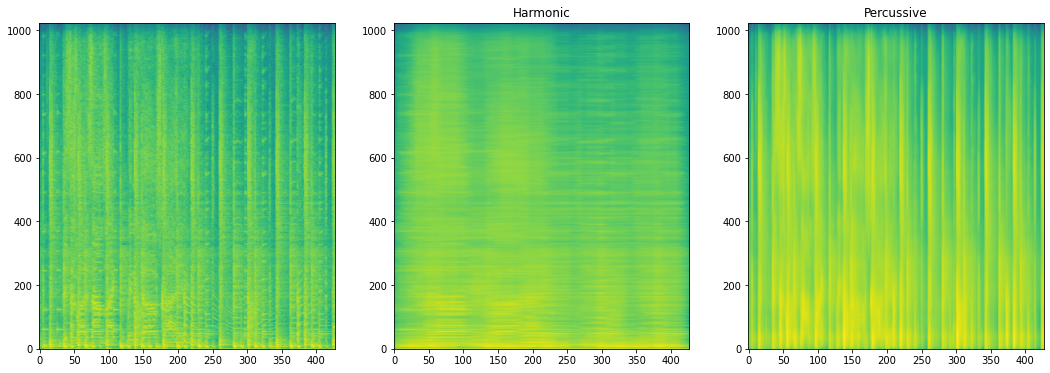

In [4]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(np.log10(SAbs/1e-3), aspect='auto')
plt.gca().invert_yaxis()
plt.subplot(132)
plt.imshow(np.log10(SH/1e-3), aspect='auto')
plt.title("Harmonic")
plt.gca().invert_yaxis()
plt.subplot(133)
plt.imshow(np.log10(SP/1e-3), aspect='auto')
plt.title("Percussive")
plt.gca().invert_yaxis()

In [5]:
y_harm = griffinLimInverse(SH, win_length, hop_length)
ipd.Audio(y_harm, rate=sr)

Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10


In [6]:
y_perc = griffinLimInverse(SP, win_length, hop_length)
ipd.Audio(y_perc, rate=sr)

Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10


### Soft Mask (Wiener Filter)


In [7]:
SFilt = S*(SH/(SH + SP))
y_filt = iSTFT(SFilt, win_length, hop_length)
ipd.Audio(y_filt, rate=sr)

In [8]:
SFilt = S*(SP/(SH + SP))
y_filt = iSTFT(S - SFilt, win_length, hop_length)
ipd.Audio(y_filt, rate=sr)

S - S*(SP/(SH + SP))
S(1 - SP/(SH + SP))
S((SH + SP - SP)/(SH + SP))
S(SH/(SH + SP))

# Matrix Decomposition of Spectrograms

In [9]:
from NMF import *
y, sr = librosa.load("doves.wav", sr=22050)
win_length = 2048*4
hop_length = 512

S = STFT(y, win_length, hop_length)
SAbs = np.abs(S)

Time elapsed H initializing: 1.55e-05


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


NMF iteration 1 of 100
VLam Elapsed Time: 0.0148
Elapsed Time H Update 0.00188
NMF iteration 2 of 100
VLam Elapsed Time: 0.0192
Elapsed Time H Update 0.00687
NMF iteration 3 of 100
VLam Elapsed Time: 0.0153
Elapsed Time H Update 0.00144
NMF iteration 4 of 100
VLam Elapsed Time: 0.015
Elapsed Time H Update 0.0148
NMF iteration 5 of 100
VLam Elapsed Time: 0.0154
Elapsed Time H Update 0.00159
NMF iteration 6 of 100
VLam Elapsed Time: 0.0155
Elapsed Time H Update 0.00159
NMF iteration 7 of 100
VLam Elapsed Time: 0.016
Elapsed Time H Update 0.00724
NMF iteration 8 of 100
VLam Elapsed Time: 0.0154
Elapsed Time H Update 0.00162
NMF iteration 9 of 100
VLam Elapsed Time: 0.0244
Elapsed Time H Update 0.0101
NMF iteration 10 of 100
VLam Elapsed Time: 0.0208
Elapsed Time H Update 0.00587
NMF iteration 11 of 100
VLam Elapsed Time: 0.0154
Elapsed Time H Update 0.00155
NMF iteration 12 of 100
VLam Elapsed Time: 0.0222
Elapsed Time H Update 0.00468
NMF iteration 13 of 100
VLam Elapsed Time: 0.0211
Ela

/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


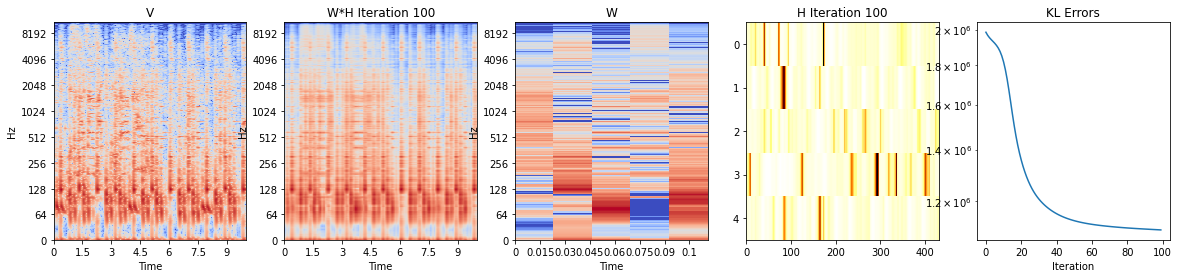

In [10]:
W, H = doNMF(SAbs, 5, 100, plotfn=lambda V, W, H, iters, errs: plotNMFSpectra(V, W, H, iters, errs, hop_length))

In [13]:
def make_html_audio(ys, sr, width=100):
    clips = []
    for y in ys:
        audio = ipd.Audio(y, rate=sr)
        audio_html = audio._repr_html_().replace('\n', '').strip()
        audio_html = audio_html.replace('<audio ', '<audio style="width: {}px; "'.format(width))
        clips.append(audio_html)
    return clips

In [14]:
ws = []
ys = []
WH = W.dot(H)
K = H.shape[0]
for i in range(K):
    Hi = np.zeros_like(H)
    Hi[i, :] = H[i, :]
    WHi = np.dot(W, Hi)
    Wi = W[:, i]
    Wi = np.reshape(Wi, (Wi.size, 1))
    Wi = Wi*np.ones((1, int(win_length/hop_length)))
    wi = griffinLimInverse(Wi, win_length, hop_length)
    ws.append(wi)
    Si = S*WHi/WH
    yi = iSTFT(Si, win_length, hop_length)
    ys.append(yi)
ys = make_html_audio(ys, sr, width=200)
ws = make_html_audio(ws, sr, width=100)
pd.set_option('display.max_colwidth', None) 
df = pd.DataFrame(OrderedDict([("Components", ws), ("Filtered", ys)]))
ipd.HTML(df.to_html(escape=False, float_format='%.2f'))

Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10
Iteration 1 of 10


/home/ctralie/anaconda3/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=8192 is too small for input signal of length=7680
  n_fft, y.shape[-1]


Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10
Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10
Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10
Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10
